In [1]:
%load_ext rpy2.ipython

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tif_path = 'data/VIIRS/SVDNB_npp_20161201-20161231_75N180W_vcmcfg_v10_c201701271136.cf_cvg.tif'

In [4]:
from tifffile import TiffFile

In [5]:
with TiffFile(tif_path) as tif:
    images = tif.asarray()
    for page in tif:
        for tag in page.tags.values():
            t = tag.name, tag.value
            image = page.asarray()

In [16]:
image.shape

(18000, 28800)

Guessed percentage size of a city: 0.0004

In [61]:
equator_circumfence = 40030 # km, obviously

In [63]:
equator_circumfence / passes[0]

1334.3333333333333

$$
\begin{aligned}
d &= 2 \text{  since it's an image} \\
k_d&: \text{  integer that can divide } d \in {n,m}\\
\delta_d&: \text{  integer that can divide } k_d \implies d\\
L_{n \times m}&: \text{ pixel luminosity } l \in (0,1)\\
S &: s_i \in \mathbb{L}_{n \times m}
\end{aligned}
$$

$$

$$

In [79]:
# passes = (int(image.shape[0]/step_size[0]-1),
#           int(image.shape[1]/step_size[1]-1))
passes
(passes[0]-1) * i*pass_size[0]

0

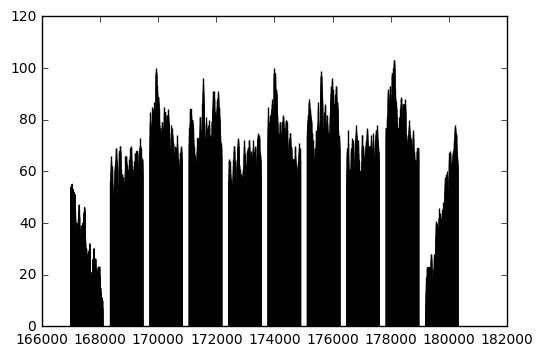

In [81]:
d = 2
pass_size = (600,600) # k
step_size = (200,200) # delta

passes = [int(image.shape[i]/step_size[i]-pass_size[i]/step_size[i]) for i in range(d)]

simages = np.zeros((passes[0]*passes[1],*pass_size))

for i in range(passes[0]):
    for j in range(passes[1]):
        sub_image = np.matrix(image[i*step_size[0]:i*step_size[0]+pass_size[0],
                                    j*step_size[1]:j*step_size[1]+pass_size[1]])
        simages[i+j] += sub_image
        
simages_sum_lum = simages.sum(axis=0)

# plot distribution of subimage luminosity
plt.hist(simages_sum_lum)
plt.show()

In [70]:
simages_sum_lum.shape

(600, 600)

In [69]:
np.percentile(simages_sum_lum,)

ValueError: Percentiles must be in the range [0,100]

In [55]:
# highest luminosity sum for a subimage
simages.sum(axis=0).max()

2563.0